<a href="https://colab.research.google.com/github/Shreyaranjan16/Hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
#Importing the librarires going to use in the Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium
from folium.plugins import HeatMap
import plotly.express as px
%matplotlib inline

In [ ]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%late

In [ ]:
# Importing the data set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Hotel analysis EDA/Hotel Bookings.csv')

In [ ]:
#Total rows and columns  of data frame
df.shape

(119390, 32)

In [ ]:
# Getting the information of the data frame 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Getting the starting 5 information about the dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# #Getting a last 5 information about the data set

In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


# Getting the information about the null value.

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# Visualization of null values

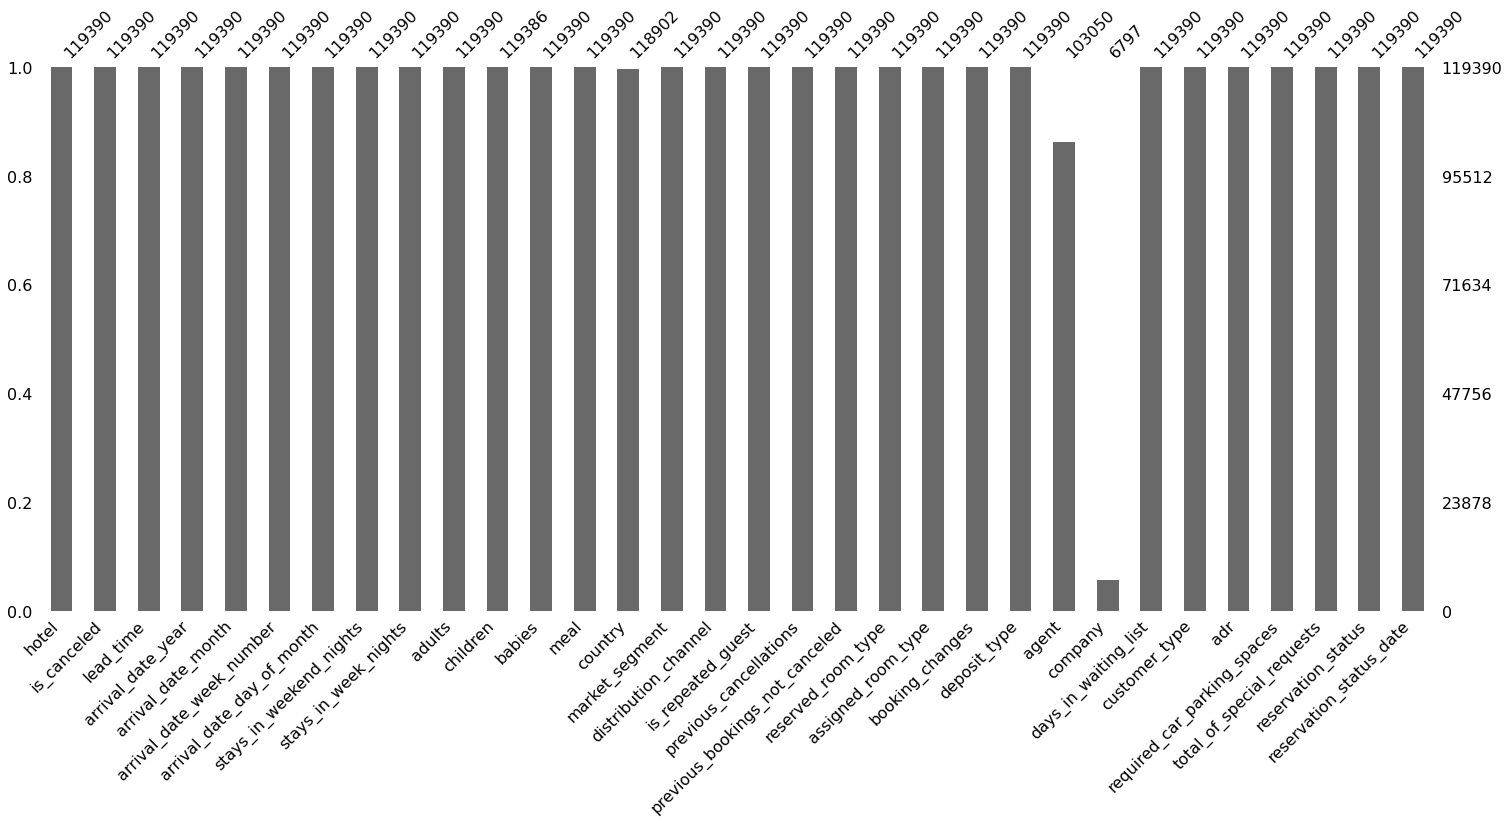

In [ ]:
msno.bar(df)
plt.show()

##Filling the null data values with 0 and creating a new data frame


In [ ]:

df2=df.fillna(value=0)

# Checking again whether null values are there or replaced.

In [ ]:
df2.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

# Getting a columns name 

In [ ]:
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# Information about the descriptions of th data set.

In [ ]:
df2.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#             DATA ANALYSIS AND VISUALIZATION

In [ ]:
#Finding the types of data in the data frame

In [ ]:
df2.dtypes.value_counts()

int64      16
object     12
float64     4
dtype: int64

**Finding the values each hotels have**

In [ ]:
df2['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

*The above table shows that maximum number of information is from city hotel*

**After the hotel information we will get the information about the arrival date as per month**

In [ ]:
df2['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

# Now we will visualize the information that we found above i.e Hotel and arrival date as per month

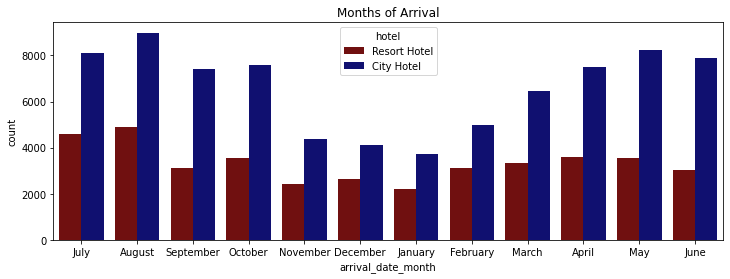

In [ ]:

colours = ["maroon", "navy",]

plt.figure(figsize=(12,4))
sns.countplot(x='arrival_date_month', hue = 'hotel', data= df2,palette=colours )
plt.title('Months of Arrival')
plt.show()

*The above plot clearly shows that maximum number of guest are visiting in august month in both the hotel.*

# Now we will find the busiest year or the year in which we have a maximum guest in the hotel

**Getting a total count year wise**

In [ ]:
df2['arrival_date_year'].value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

# Visualization of the year in which maximum guest arrive.

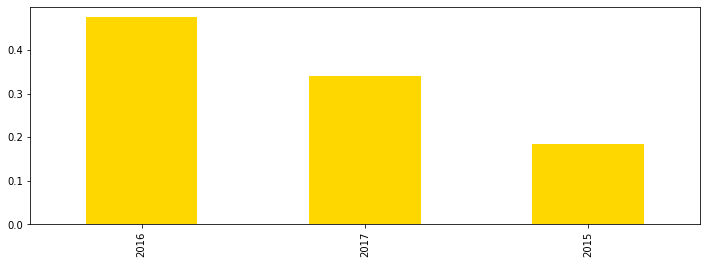

In [ ]:

plt.figure(figsize=(12,4))
df.arrival_date_year.value_counts(normalize=True).plot(kind="bar",color='Gold',)
                                                         
plt.show()

*The above graph clearly shows that maximum number of guest arrived in 2016 i.e 56707*

# How does the price vary per night over the year?

In [ ]:
data_resort = df2[(df2['hotel'] == 'Resort Hotel') & (df2['is_canceled'] == 0)]
data_city = df2[(df2['hotel'] == 'City Hotel') & (df2['is_canceled'] == 0)]


 **Resort hotel ADR analysis**

In [ ]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel






,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


# Visualization of Resort hotel as per average distributed rate.

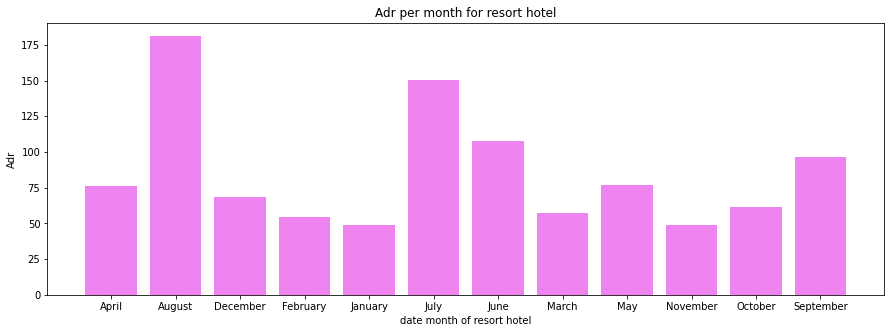

In [ ]:
date_month_resort_hotel=resort_hotel['arrival_date_month']
average_distributed_rate=resort_hotel['adr']
c='violet'
fig = plt.figure(figsize =(15,5))
#Creating the bar plot
plt.bar(date_month_resort_hotel, average_distributed_rate,color = c)
plt.xlabel("date month of resort hotel")
plt.ylabel("Adr")
plt.title("Adr per month for resort hotel")
plt.show()

*This graph shows that august is having a highest average distributed rate followed by july and june.*

 **CITY RESORT ADR REVIEW**

In [ ]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


# Visualization of city hotel as per average distributed rate.

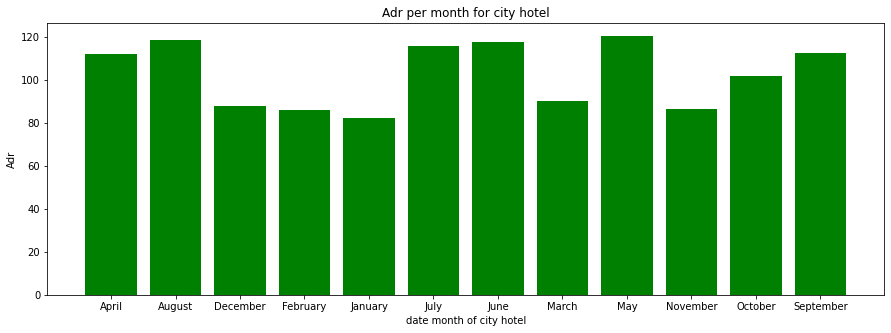

In [ ]:
date_month_city_hotel=city_hotel['arrival_date_month']
average_distributed_rate=city_hotel['adr']
fig = plt.figure(figsize =(15,5))
g='Green'
#Creating the bar plot
plt.bar(date_month_city_hotel, average_distributed_rate,color='g')
plt.xlabel("date month of city hotel")
plt.ylabel("Adr")
plt.title("Adr per month for city hotel")
plt.show()

the graph shows that august is having a highest averahe distributed rangefollowed by june and july*

# Now we will analyse from which part of the country people are coming in  the hotel and from which country maximum guest came.

In [ ]:
country_wise_guests = df2[df2['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


# Visualizing the above table as per the map.

In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

\*Most guest are from Portugal and other Europian contries.*

# Information about the type of customer coming in the hotel

In [ ]:
df2['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

# Visualization of type of customer 

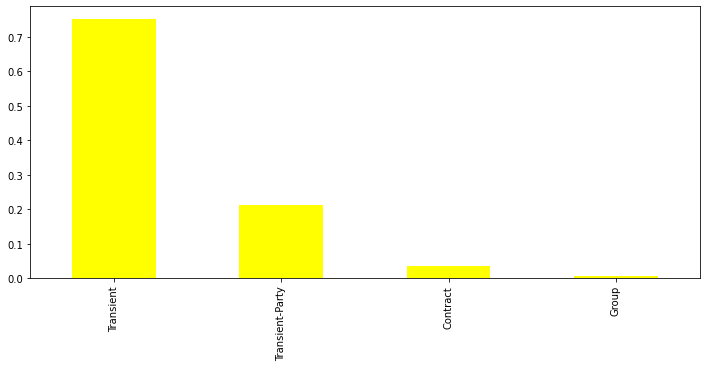

In [ ]:
plt.figure(figsize=(12,5))
df2.customer_type.value_counts(normalize=True).plot(kind="bar",color='yellow')
plt.show()

*Maximum number of customer is from transient type followed by transient party*

# Next from the data set we are going to determine the type of deposit and finding the prefreable deposit type

In [ ]:
df2['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

# Visualization of the type of deposit

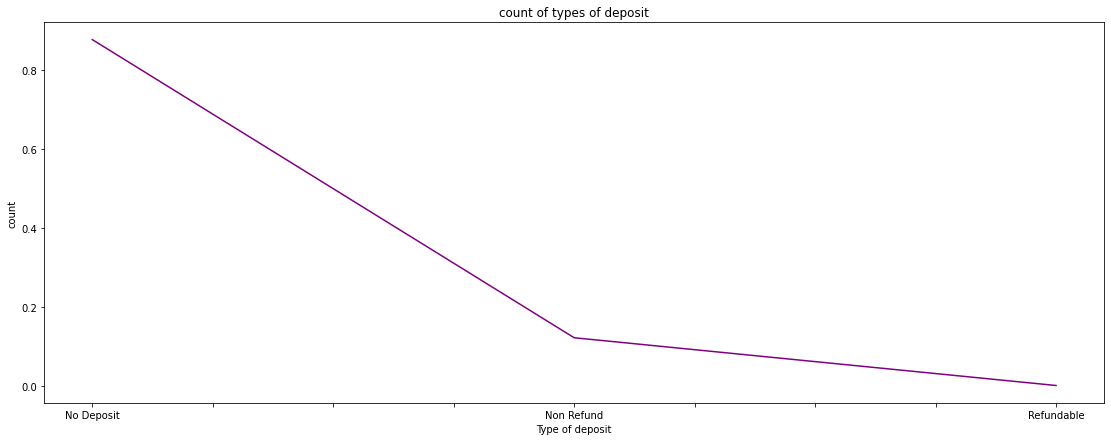

In [ ]:
plt.figure(figsize=(19,7))
p ='purple'
df2.deposit_type.value_counts(normalize=True).plot(kind="line",color=p)
plt.xlabel("Type of deposit")
plt.ylabel("count")   
plt.title("count of types of deposit")                                                     
plt.show()

*From the above data and graph it is clearly seen at more people are prefering the no deposit as compared to non refund and refundable.And the data set also show that people are prefering the non refund as compared to refundable.*

# Now lets go and find out which type of meal people are prefering while staying in the hotel

In [ ]:
df2['meal'].value_counts().reset_index()

,index,meal
0,BB,92310
1,HB,14463
2,SC,10650
3,Undefined,1169
4,FB,798


In [ ]:
print('*',"abcde".center(6),'*',sep='')

*abcde *


# Visualizing the meals prefered by guest

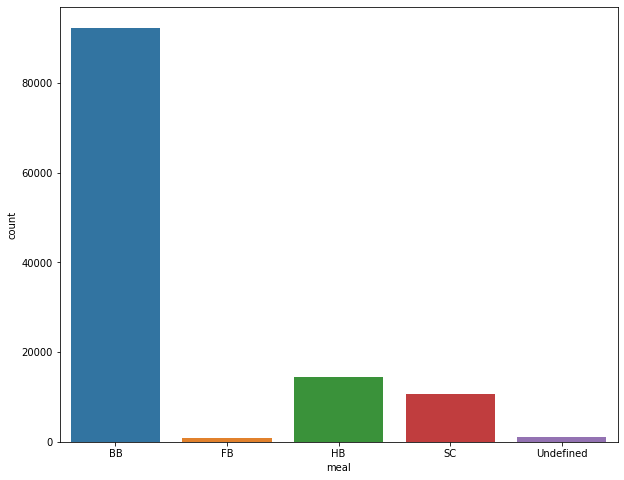

In [ ]:
plt.figure( figsize=(10, 8))

sns.countplot(x = df2['meal'])
plt.show()

*The above graph clearly shows that people are prefering BB and the least meal in which people are intrested is FB.*

# Come on, Lets see till now how much people have visited the hotel and which hotel have hosted the maximum guest

**Total number of guest ** 


In [ ]:
df2['total_people']=df2['adults']+df2['children']+df2['babies']
df2['total_people'].sum()

234988.0

**Hotel wise people in the hotels**

In [ ]:
hotel_people=df2.groupby(['hotel'])['total_people'].sum().reset_index()
hotel_people

,hotel,total_people
0,City Hotel,154478.0
1,Resort Hotel,80510.0


# Visualization of the number of people in a hotel

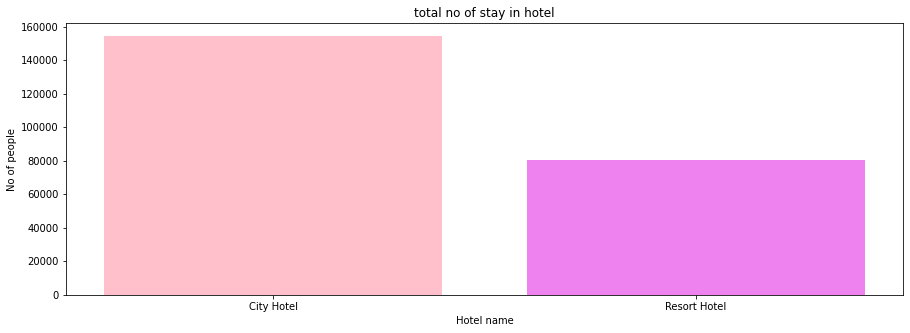

In [ ]:
hotel=hotel_people['hotel']
people=hotel_people['total_people']
fig = plt.figure(figsize =(15,5))
a='pink','violet'
#Creating the bar plot
plt.bar(hotel, people,color=a)
plt.xlabel("Hotel name")
plt.ylabel("No of people")
plt.title("total no of stay in hotel")
plt.show()

*The graph clearly shows that maximum number of people are visiting city hotel.*

# Before determining the market segment lets know what market segment is .Market segmentation is a marketing strategy in which select groups of consumers are identified so that certain products or product lines can be presented to them in a way that appeals to their interests

**Types of market segment with there values**

In [ ]:
df2['market_segment'].value_counts().reset_index()

,index,market_segment
0,Online TA,56477
1,Offline TA/TO,24219
2,Groups,19811
3,Direct,12606
4,Corporate,5295
5,Complementary,743
6,Aviation,237
7,Undefined,2


# Visualization of market segment 

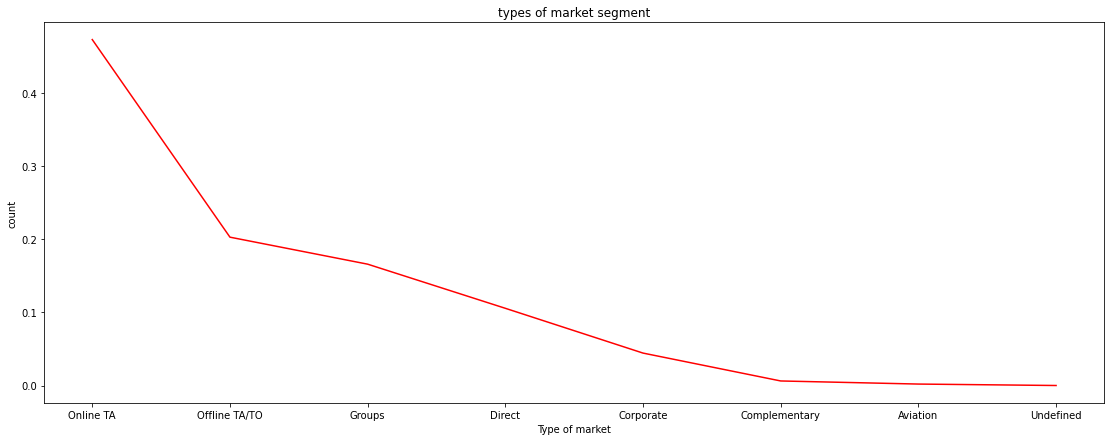

In [ ]:
plt.figure(figsize=(19,7))
p ='red'
df2.market_segment.value_counts(normalize=True).plot(kind="line",color=p)
plt.xlabel("Type of market")
plt.ylabel("count")   
plt.title("types of market segment")                                                     
plt.show()

The highest segment of market that hotels are getting is Online TA  and they should focus more on online TA compared to other type of segment.

# We are now doing a visualization of cancelled booking in both the hotel.

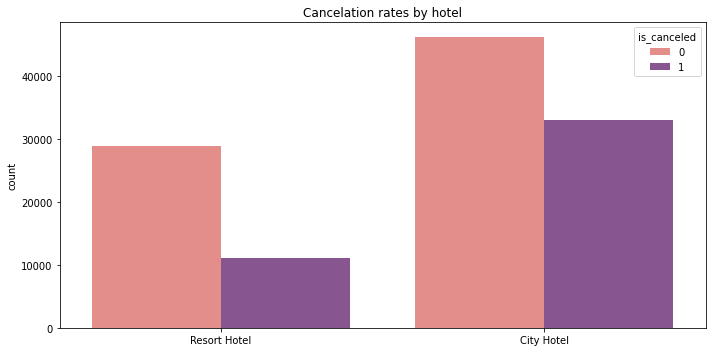

In [ ]:
plt.figure(figsize = (10, 5))

sns.countplot(x = 'hotel', data = df, hue = 'is_canceled', palette = 'magma_r', alpha = 0.8).set(xlabel = None)
plt.title('Cancelation rates by hotel')

plt.tight_layout()

 *here zero shows that much of booking is not cancelled and 1 represent the cancelled booking*
 *By the graph we can come to the conclusion city hotel booking are cancelled more than the resort hotel booking*

# Now lets find out about the distribution channel which should be followed by the hotel.

In [ ]:
df2['distribution_channel'].value_counts().reset_index()

,index,distribution_channel
0,TA/TO,97870
1,Direct,14645
2,Corporate,6677
3,GDS,193
4,Undefined,5


# Visualization of distribution channel

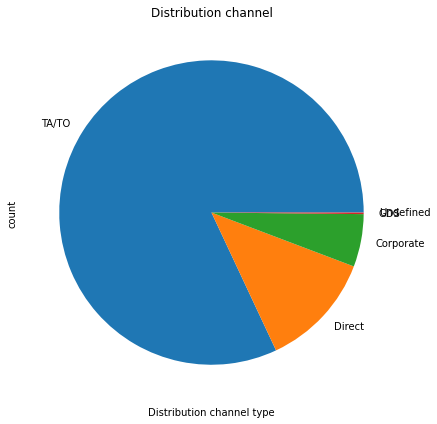

In [ ]:
plt.figure(figsize=(19,7))

df2.distribution_channel.value_counts(normalize=True).plot(kind="pie")
plt.xlabel("Distribution channel type")
plt.ylabel("count")   
plt.title("Distribution channel")                                                     
plt.show()


*The distribution channel TA/TO  is the most used distribution channel used by a hotel.*

# Now lets see how many guest require parking and which hotel get more number of people with parking requirement.

**Find the people require parking**

In [ ]:
df2['required_car_parking_spaces'].value_counts().reset_index()

,index,required_car_parking_spaces
0,0,111974
1,1,7383
2,2,28
3,3,3
4,8,2


**Hotel wise parking requirment**

In [ ]:
parking_hotel=df2.groupby(['hotel'])['required_car_parking_spaces'].value_counts()
parking_hotel

hotel         required_car_parking_spaces
City Hotel    0                              77404
              1                               1921
              2                                  3
              3                                  2
Resort Hotel  0                              34570
              1                               5462
              2                                 25
              8                                  2
              3                                  1
Name: required_car_parking_spaces, dtype: int64

# Visualization of the above data

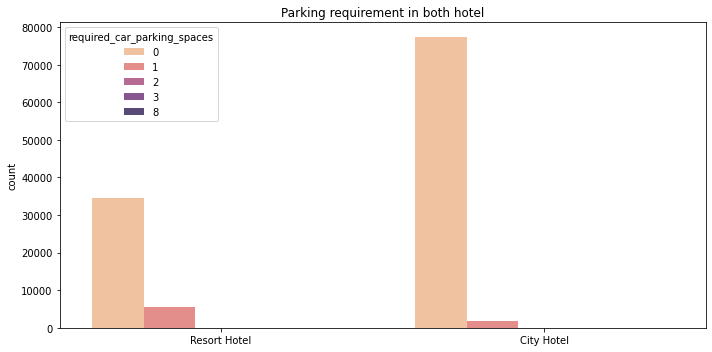

In [ ]:
plt.figure(figsize = (10, 5))

sns.countplot(x = 'hotel', data = df, hue = 'required_car_parking_spaces', palette = 'magma_r', alpha = 0.8).set(xlabel = None)
plt.title('Parking requirement in both hotel')

plt.tight_layout()

The graph clearly shows that the maximum no of people not require parking but the people wh require need 1 parking.Very less people require more than 2 parking space.

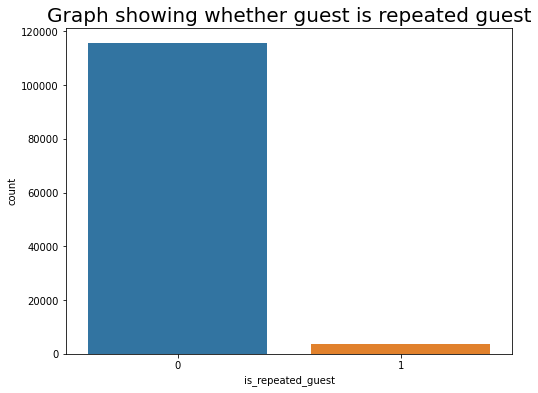

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data = df2, x = 'is_repeated_guest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)
plt.show()

*### Low number of repeated guests.
### A need to target repeated guests since they have booked before. ***

# **Conclusion**

### Majority of the hotels booked are city hotel. Definitely need to spend the most targeting fund on those hotel.
### We also realise that the high rate of cancellations can be due high no deposit policies.
### We should also target months between May to Aug. Those are peak months due to the summer period.
### Majority of the guests are from Western Europe. We should spend a significant amount of our budget on those area.
### Given that we do not have repeated guests, we should target our advertisement on guests to increase returning guests.
### In terms of market segments and distribution channels, TA and TO have shown to be the strongest, followed by the direct channel with the hotel. In the last case, the use of this channel could be incentivized by means of a special offer.